In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
feature = pd.read_csv('https://raw.githubusercontent.com/VidushB/2023MLSummerSchool/main/Day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/VidushB/2023MLSummerSchool/main/Day5/fish_market_label.csv')

In [3]:
from sklearn.model_selection import train_test_split
X = feature.values
y = label.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=10)

#Do not touch testing data until your model is finalized. And never train on testing or validation data
X_test = pd.read_csv('https://raw.githubusercontent.com/VidushB/2023MLSummerSchool/main/Day5/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/VidushB/2023MLSummerSchool/main/Day5/fish_market_test_label.csv').values

In [4]:
from math import sqrt
def print_and_plot(y_pred, y):
    MAE = np.mean(np.abs(y_pred - y))
    MSE = np.mean((y_pred - y)**2)
    #MSE = mean_squared_error(y,y_pred)  #alternatively, you can use sklearn mean_squared_error
    print ('The MSE is {:0.2f}'.format(MSE))
    print('The RMSE is {:0.2f}'.format(sqrt(MSE)))
    print ('The MAE is {:0.2f}'.format(MAE))
    plt.figure(figsize=(8,6))
    plt.plot(y_pred, 'o', label='predicted')
    plt.plot(y, 'o', label='ground truth')
    plt.legend(loc='upper left')
    plt.grid()
    plt.ylabel('Weight')
    plt.xlabel('Index of Sample')
    plt.show()

##Linear Regression (Ordinary Least Squares) Validation

The MSE is 4197.60
The RMSE is 64.79
The MAE is 48.01


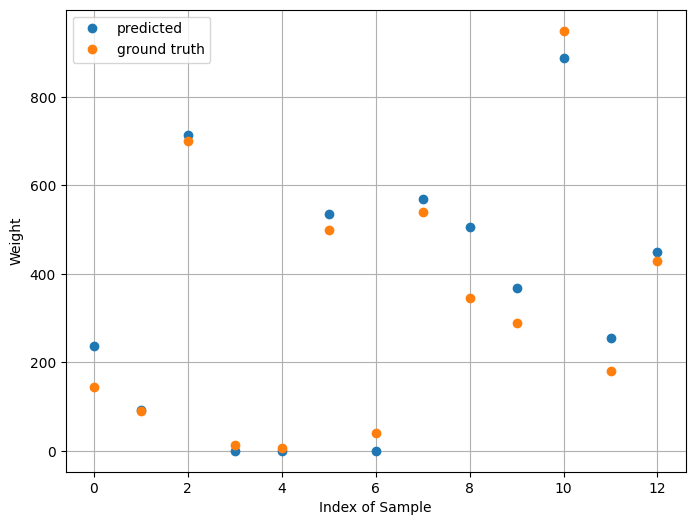

In [5]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

# If a prediction is negative, set it to zero. Negative fishweights do not make sense and can contribute to higher loss values.
y_hat_val = np.maximum(model1.predict(X_val), 0)
print_and_plot(y_hat_val, y_val)

## Now, run on the test set:

The MSE is 5657.29
The RMSE is 75.21
The MAE is 57.16


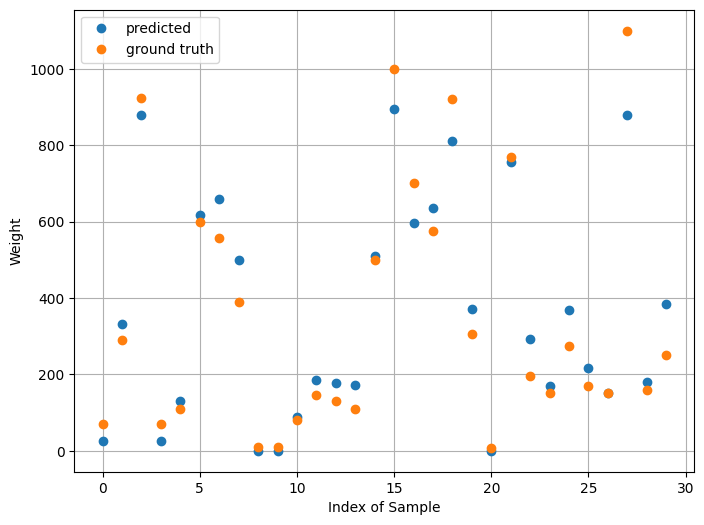

In [7]:
y_hat_test = np.maximum(model1.predict(X_test), 0)
print_and_plot(y_hat_test, y_test)

##Lasso linear regression

The MSE is 182370.13
The RMSE is 427.05
The MAE is 338.22


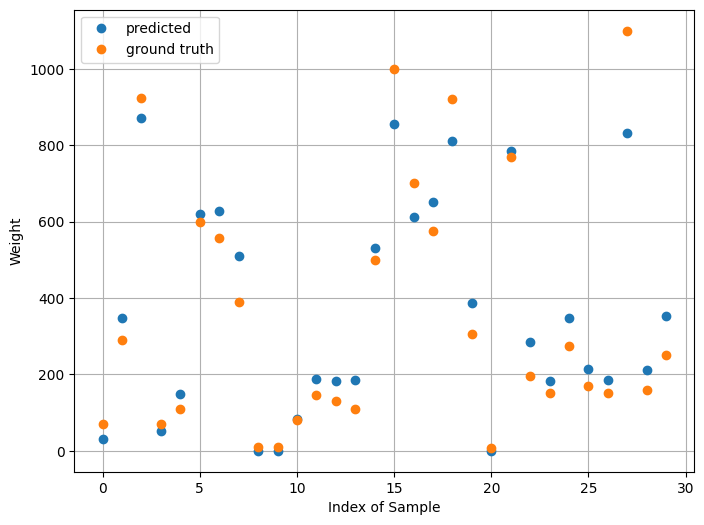

In [8]:
model2 = Lasso(alpha=10,max_iter=2000)
model2.fit(X_train, y_train)

# If a prediction is negative, set it to zero
y_hat = np.maximum(model2.predict(X_test), 0)
print_and_plot(y_hat, y_test)

## Ridge regression without feature engineering

The MSE is 5660.82
The RMSE is 75.24
The MAE is 57.21


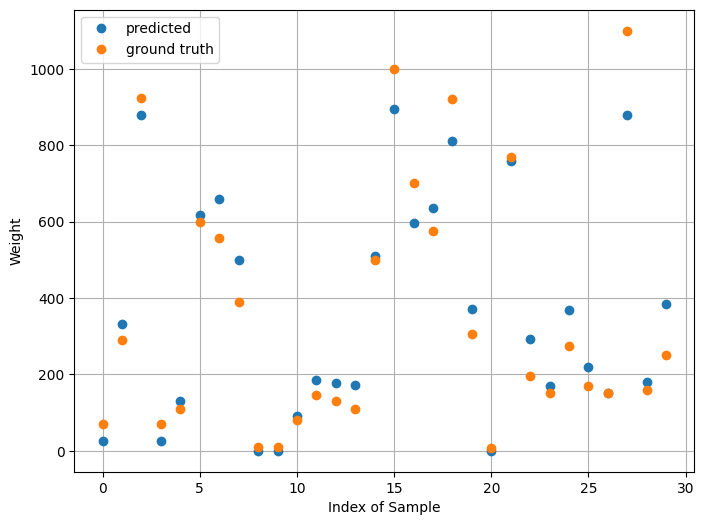

In [9]:
model3 = Ridge(alpha=0.1)
model3.fit(X_train, y_train)

# If a prediction is negative, set it to zero
y_hat = np.maximum(model3.predict(X_test), 0)
print_and_plot(y_hat, y_test)

## Ridge regression with polynomial feature transformation

The MSE is 3664.24
The RMSE is 60.53
The MAE is 36.75


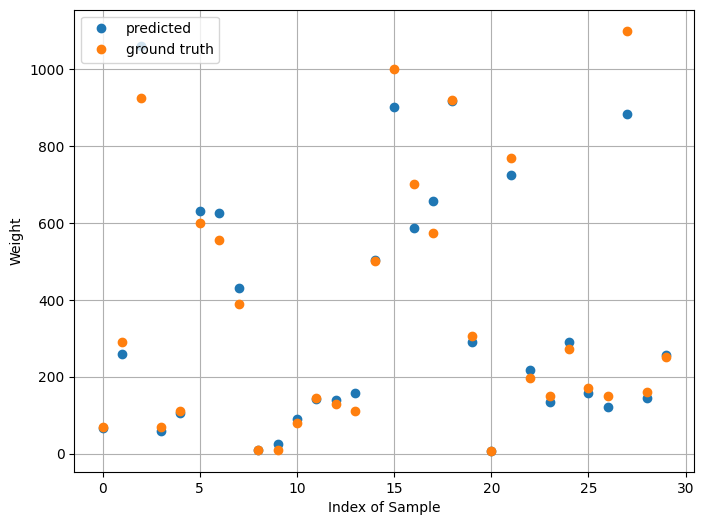

In [10]:
def design_matrix(x, M):
  phi = np.ones((x.shape[0],1))
  for i in range(1,M+1):
    phi = np.hstack((phi,x**i))
  return phi

M= 3

PhiX_train = design_matrix(X_train, M)
PhiX_test = design_matrix(X_test, M)

model4 = Ridge(alpha=0.1, fit_intercept=False)
model4.fit(PhiX_train, y_train)
y_hat = model4.predict(PhiX_test)
print_and_plot(y_hat, y_test)

## Random Forest Regression without and with polynomial feature transformation:

The MSE is 2986.65
The RMSE is 54.65
The MAE is 35.08


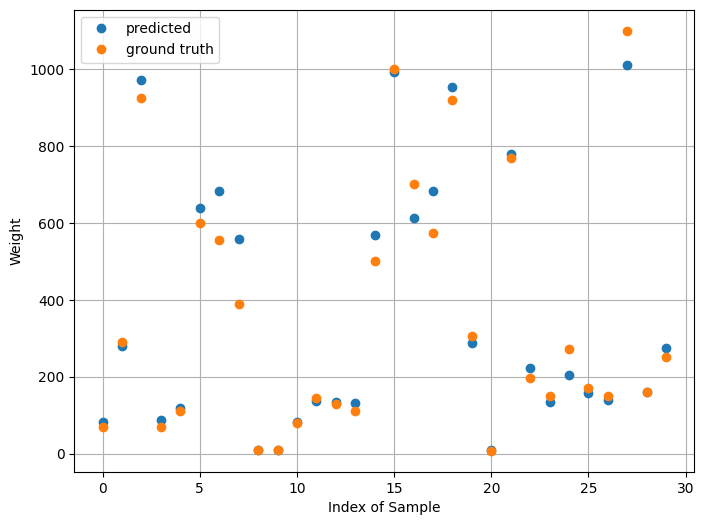

In [11]:
model5 = RandomForestRegressor(random_state=0)
model5=model5.fit(X_train, y_train.ravel())  #requires a 1D array rather than a column vector, hence the .ravel()

# If a prediction is negative, set it to zero
y_hat = np.maximum(model5.predict(X_test), 0).reshape((-1,1)) #RandomForestRegressor returns y of shape (n_samples,) and must be reshaped
print_and_plot(y_hat, y_test)

The MSE is 2949.80
The RMSE is 54.31
The MAE is 34.70


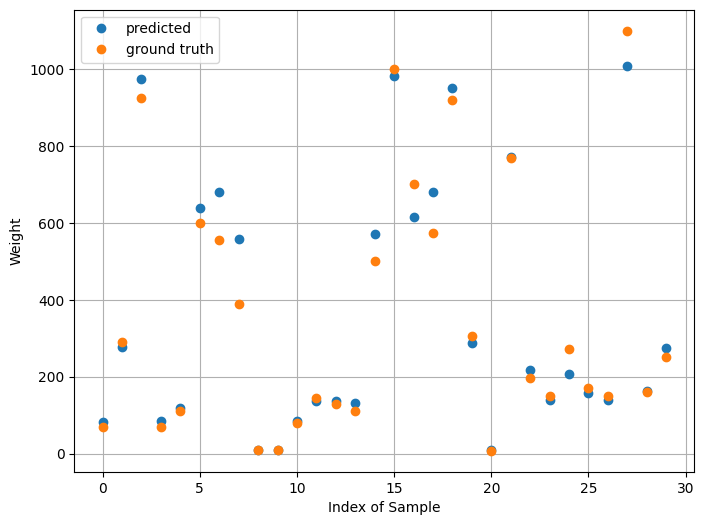

In [12]:
model6 = RandomForestRegressor(random_state=0)
model6=model5.fit(PhiX_train, y_train.ravel())  #requires a 1D array rather than a column vector, hence the .ravel()

# If a prediction is negative, set it to zero
y_hat = np.maximum(model6.predict(PhiX_test), 0).reshape((-1,1)) #RandomForestRegressor returns y of shape (n_samples,) and must be reshaped
print_and_plot(y_hat, y_test)